# Data Visulaization for Predicting Employee Attrition 
*By Bhavya Bhargava*<br>

### **Why Visualize HR Attrition Data?**  

Once HR attrition data is cleaned and processed, **data visualization** becomes crucial for uncovering hidden patterns, trends, and relationships that raw numbers alone can't reveal. Visualizations help:  

📊 **Identify Key Attrition Drivers** – Understanding how factors like job satisfaction, promotions, salary hikes, and work-life balance influence employee turnover.  

📈 **Spot Trends & Patterns** – Detecting seasonal attrition trends, department-specific turnover, and tenure-related retention challenges.  

🔍 **Compare Groups Effectively** – Using bar charts, heatmaps, and scatter plots to analyze differences between high-risk vs. low-risk employees.  

📢 **Enhance Stakeholder Communication** – Clearing visuals make it easier for HR teams and executives to interpret data-driven insights and take proactive measures.  

By leveraging visualizations, companies can **optimize retention strategies**, improve employee satisfaction, and make **data-backed HR decisions** to reduce attrition. 🚀
<br>
<br>
_Now let's start with creating a focused data visualization analysis of the most significant factors affecting employee attrition that tell the most important insights about it._
<br>
<br>
Let's start off by setting up the environmment for visulizations.

In [10]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Set the style
sns.set_theme(style="white", font_scale=1.2)
plt.style.use('classic')

# For seeing the whole dataset
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

# Read the dataset
employee_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition_Processed.csv')

# For ignoring unncecessary warnings that may arise
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

For our first plot let's start off by plotting the overall attrition rate

Text(0.5, 1.0, 'Overall Employee Attrition Rate')

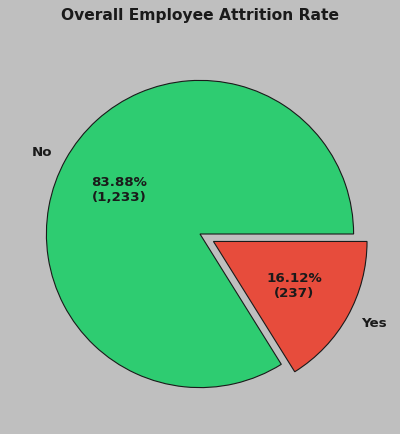

In [12]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
attrition_rate = employee_data["Attrition"].value_counts()
labels = attrition_rate.index  # ["No", "Yes"]
sizes = attrition_rate.values  # Actual counts
total = sum(sizes)
def autopct_format(pct):
    count = int(round(pct * total / 100.0))
    return "{:.2f}%\n({:,})".format(pct, count)
plt.pie(attrition_rate, labels=["No", "Yes"], autopct= autopct_format,
        colors=["#2ecc71", "#e74c3c"], explode=[0, 0.1],
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title("Overall Employee Attrition Rate", pad=20, fontsize=14, fontweight='bold')

From the above we can infer and speculate:
1. High Retention Rate: The vast majority of employees (83.88%) have stayed with the company, indicating strong retention.
2. Significant Attrition (16.12%): This attrition rate could be a concern, depending on industry benchmarks. HR should analyze trends to address potential causes.

To confirm these let's proceed with some more visulaizations using the features which were highly correlated with attrition (when checked during preparation).
<br>
Here's a list of those features with their correlation to attrition:<br>
Attrition                 1.000000<br>
OverTime_Encoded          0.246118<br>
MaritalStatus_Encoded     0.162070<br>
CareerProgressionRatio    0.148505<br>
WorkLoadIndex             0.107848
<br>
<br>
**Type 1 data visuals-**
<br>
From this list we'll have our first visual for OverTime_Encoded vs Attrition. A count plot seems most suited for this.

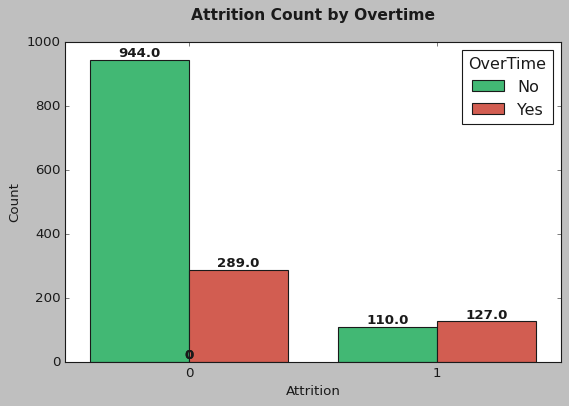

In [18]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Attrition", hue="OverTime", data=employee_data, 
                   palette=["#2ecc71", "#e74c3c"])

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Attrition Count by Overtime", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.legend(title="OverTime")
plt.show()


Observations:
- Employees who don't work overtime have higher raw numbers leaving (944 vs 289), but proportionally, overtime workers have a higher attrition rate when comparing relative group sizes. This Infers that employees doing a lot of time might be feeling the heat and leaving.

Now it's turn of MaritalStatus_Encoded vs Attrition. We'll be using box plots for this.

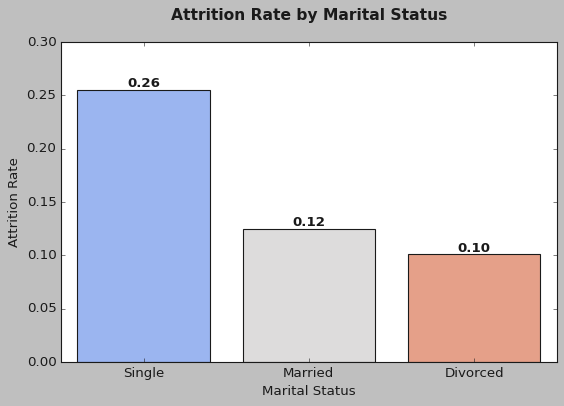

In [20]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="MaritalStatus", y="Attrition", data=employee_data, 
                 ci=None, palette="coolwarm")

# Add numerical labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Attrition Rate by Marital Status", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Marital Status")
plt.ylabel("Attrition Rate")
plt.show()


Observations:
- Single employees have significantly higher attrition (26%) compared to married (12%) or divorced (10%), suggesting marital status impacts job stability.

Moving forward with the visualization for Career Progression Ratio vs Attrition. We have deceided to go with a Violin plot (with medians) for this.

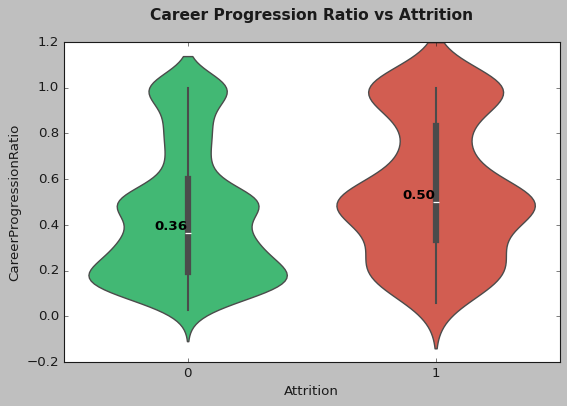

In [25]:
plt.figure(figsize=(8, 5))
ax = sns.violinplot(x="Attrition", y="CareerProgressionRatio", data=employee_data, 
                     palette=["#2ecc71", "#e74c3c"])

# Adding median labels
medians = employee_data.groupby("Attrition")["CareerProgressionRatio"].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', ha='right', va='bottom', 
             fontsize=12, fontweight='bold', color="black")

plt.title("Career Progression Ratio vs Attrition", pad=20, fontsize=14, fontweight='bold')
plt.show()

Observations:
- Employees who left (Attrition=1) had higher career progression ratios (0.50 vs 0.36), suggesting they may have been more ambitious or had better opportunities elsewhere.

Finally we'll present the visulaization for Work Load Index vs Attrition. A box plot (with Medians) will be utilized for this.

<Figure size 800x480 with 0 Axes>

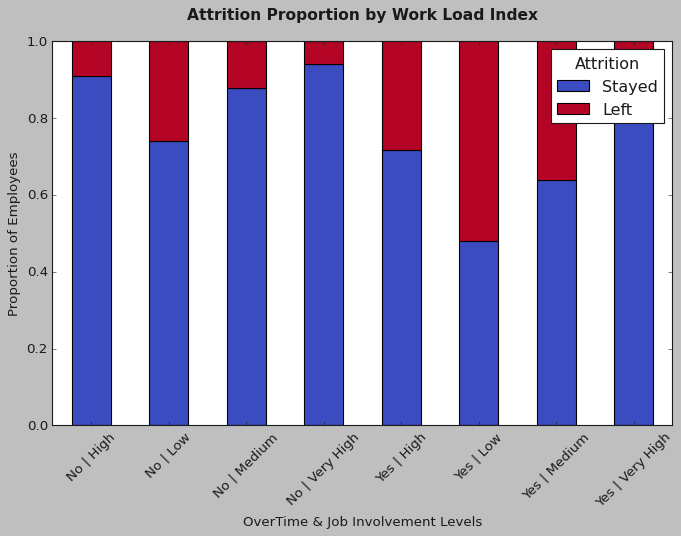

In [27]:
plt.figure(figsize=(10, 6))

# Creating a normalized count table
workload_attrition = employee_data.groupby(["WorkLoadLabel", "Attrition"]).size().unstack()
workload_attrition_norm = workload_attrition.div(workload_attrition.sum(axis=1), axis=0)

# Plotting stacked bar chart
workload_attrition_norm.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm", edgecolor="black")

plt.title("Attrition Proportion by Work Load Index", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("OverTime & Job Involvement Levels")
plt.ylabel("Proportion of Employees")
plt.xticks(rotation=45)
plt.legend(["Stayed", "Left"], title="Attrition")
plt.show()


Observations:
- Work load index shows varying attrition patterns across different overtime and job involvement levels, with particularly high attrition in employees doing overtime but having less job involvement.

<u>_Overall inference from Type 1 Data Visuals:_</u><br>
The data suggests attrition is a complex phenomenon driven by multiple factors - personal life stability (marital status), work-life balance (overtime), career growth opportunities, and job engagement levels all play significant roles.<br> 
The patterns indicate that single employees with good career progression but low job involvement are at highest risk of leaving, especially if they're working overtime. This points to a need for targeted retention strategies based on employee segments rather than a one-size-fits-all approach.

While these are some of the most relevant factors, there can be other secondary resaons for atrition. For that we'll look at a few generally known reasons for attrition.
<br>
<br>
**Type 2 data visuals-**
We'll start off here by drawing a visual comaring attrition with yearly salary and overall salary hike.

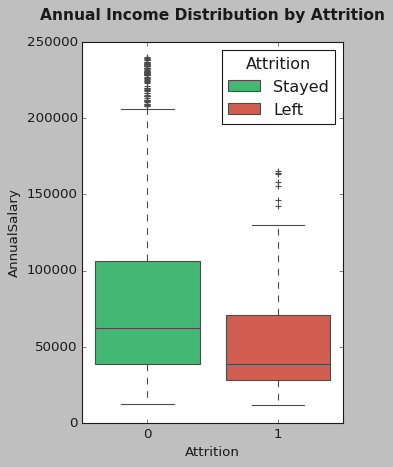

In [43]:
# Monthy Income vs Attrition
plt.subplot(1, 2, 2)
sns.boxplot(x="Attrition", y="AnnualSalary", data=employee_data, 
            palette=["#2ecc71", "#e74c3c"])
plt.title("Annual Income Distribution by Attrition", pad=20, fontsize=14, fontweight='bold')
plt.legend(["Stayed", "Left"], title="Attrition")
plt.tight_layout()
plt.show()

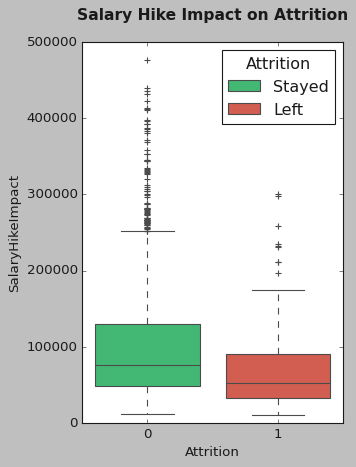

In [31]:
# Salary Hike impact vs Attrition
plt.subplot(1, 2, 2)
sns.boxplot(x="Attrition", y="SalaryHikeImpact", data=employee_data, 
            palette=["#2ecc71", "#e74c3c"])
plt.title("Salary Hike Impact on Attrition", pad=20, fontsize=14, fontweight='bold')
plt.legend(["Stayed", "Left"], title="Attrition")
plt.tight_layout()
plt.show()

Observations:
- Employees who left generally had lower salaries than those who stayed, with the median income notably lower for those who left.
- Those who stayed received higher salary hikes overall, suggesting compensation growth matters for retention.

We can also perform an analysis on job level and department vs attrition.

Text(0, 0.5, 'Attrition Rate (%)')

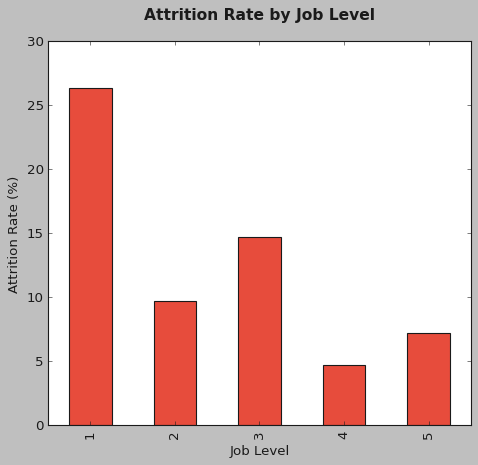

In [37]:
# Job Level Analysis
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
job_level_attrition = pd.crosstab(employee_data.JobLevel, employee_data.Attrition, normalize='index') * 100
job_level_attrition[1].plot(kind='bar', color='#e74c3c')
plt.title('Attrition Rate by Job Level', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Job Level')
plt.ylabel('Attrition Rate (%)')


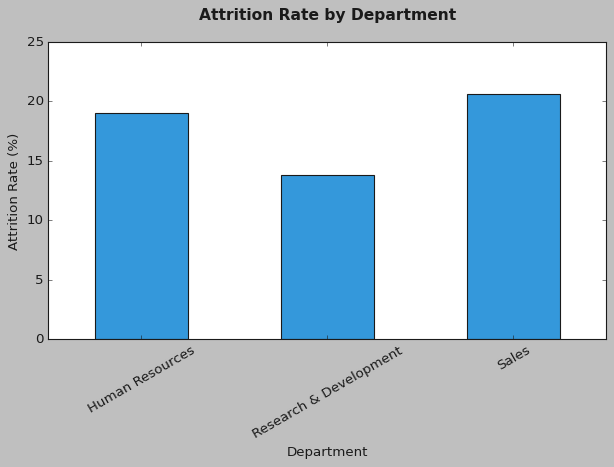

In [38]:
# Department Analysis
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
dept_attrition = pd.crosstab(employee_data.Department, employee_data.Attrition, normalize='index') * 100
dept_attrition[1].plot(kind='bar', color='#3498db')
plt.title('Attrition Rate by Department', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

_Observations:_
- Entry-level positions (Level 1) have dramatically higher attrition (26%) compared to senior roles (Level 4-5: ~5-7%)
- Sales and HR have higher attrition (~20%) compared to R&D (~13%), indicating department-specific challenges
<br>
<br>
Finally age and years of experience can also play a major role in employees attrition. So it's only natural to do analysis with them too.

Text(0.5, 1.0, 'Age Distribution by Attrition')

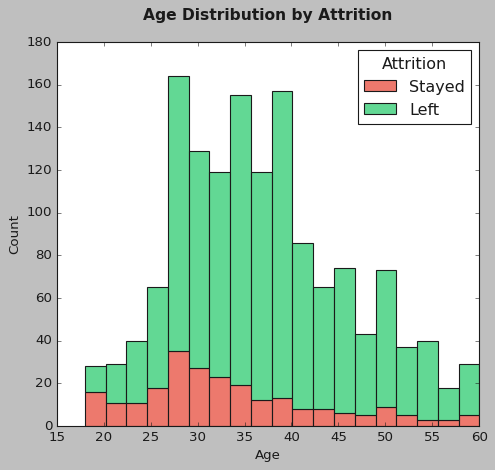

In [41]:
# Age Distribution to Attrition
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=employee_data, x='Age', hue='Attrition', 
             palette=["#2ecc71", "#e74c3c"], multiple="stack")
plt.legend(["Stayed", "Left"], title="Attrition")
plt.title('Age Distribution by Attrition', pad=20, fontsize=14, fontweight='bold')

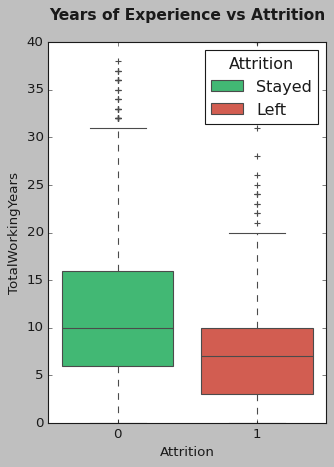

In [42]:
# Years of Experience vs Attrition
plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=employee_data,
            palette=["#2ecc71", "#e74c3c"])
plt.title('Years of Experience vs Attrition', pad=20, fontsize=14, fontweight='bold')
plt.legend(["Stayed", "Left"], title="Attrition")
plt.tight_layout()
plt.show()

_Observations:_
- Attrition is highest among younger employees (25-35 age group), with significantly lower retention rates.
- Those who left typically had fewer years of experience, suggesting early-career employees are more likely to leave.

#### Final Observations:
1. Young, single, entry-level employees in Sales/HR with low salaries and high overtime are the highest flight risk despite good career progression potential.

2. Traditional career advancement metrics aren't sufficient for retention as shown by the paradox of higher attrition among those with better career progression ratios.

3. Experience significantly reduces attrition risk, creating a challenging cycle of needing to retain employees long enough to become experienced stabilizers.

4. Departmental culture significantly impacts retention as evidenced by the stark difference between R&D and Sales/HR attrition rates.

5. The solution requires a targeted approach combining better entry-level compensation, work-life balance initiatives, and engagement programs for young professionals in high-risk departments.